# Aprendizagem de M√°quina I - 2023/02

## Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

#### Google Classroom: `zqdk53w`

Este notebook √© correspondente ao nosso terceiro projeto, passado no dia 25/11/2023 e para entrega no dia 17/12/2023 (data improrrog√°vel). A entrega da atividade deve ser feita atrav√©s do Google Classroom, fazendo um upload deste notebook, devidamente atualizado com suas implementa√ß√µes e explica√ß√µes. Recomendo fortemente que fa√ßam o trabalho no Google Colab, pois assim temos certa garantia de estarmos rodando tudo no mesmo ambiente, e eu conseguir executar o c√≥digo de voc√™s sem dificuldades.

O projeto poder√° ser feito **at√©** em dupla: quem quer fazer sozinho/a faz, mas quem quiser fazer em dupla tamb√©m tem esse direito. Por√©m, vamos evitar problemas de "eu fiz tudo e ele/a n√£o fez nada"! Infelizmente n√£o tenho como controlar isso, e ap√≥s o projeto entregue n√£o adianta "eu fiz tudo sozinho/a", pois eu n√£o estava l√° para ver! Tentem se resolver entre si, mas em √∫ltimo caso posso auxiliar com uma media√ß√£o.

# <center> Este √© o enunciado do nosso terceiro (e √∫ltimo!) projeto. Por favor o leia com aten√ß√£o, pois todas as instru√ß√µes e objetivos est√£o detalhados aqui! </center>

O objetivo deste trabalho √© analisar [esta](https://www.kaggle.com/fmena14/volcanoesvenus) base de dados, que cont√©m imagens de sat√©lite da superf√≠cie de V√™nus, e deseja-se estudar a ocorr√™ncia ou n√£o de vulc√µes na superf√≠cie do planeta. A base de dados est√° contida no arquivo `dataset.zip`, anexo junto com essa atividade no Google Classroom, e mais abaixo irei detalhar os seus 4 arquivos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Eis aqui o conjunto de treinamento. Voc√™ pode (e deve!) fazer valida√ß√£o cruzada nele para comparar diversos classificadores, mas o conjunto de teste ser√° mostrado mais abaixo. Note que n√£o h√° necessidade de fazer `train_test_split` com a base carregada a seguir, pois mais adiante carregaremos o arquivo com o conjunto de teste!

In [2]:
feat = pd.read_csv('train_images.csv', header = None) # 'header = None' √© importante pois o .csv n√£o tem cabe√ßalho
resp = pd.read_csv('train_labels.csv')

display(feat)

0      1      2      3      4      5      6      7      8      9      \
0        95    101     99    103     95     86     96     89     70    104   
1        91     92     91     89     92     93     96    101    107    104   
2        87     70     72     74     84     78     93    104    106    106   
3         0      0      0      0      0      0      0      0      0      0   
4       114    118    124    119     95    118    105    116    123    112   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6995     90     96     88     95     94    100     95     80     80     71   
6996     82     82     84     91     74     61     73     80     75     97   
6997    133    102    121    133    129    131     98    121    123    125   
6998    118    117    115    107     92     76    100    102     81    106   
6999     74     89     92     87     72    102    100     92     86    107   

      ...  12090  12091  12092  12093  12094  12095  12096  12097  12098  \
0     ...    111    107     92     89    103     99    117    116    118   
1     ...    103     92     93     95     98    105    104    100     90   
2     ...     84     71     95    102     94     80     91     80     84   
3     ...     94     81     89     84     80     90     92     80     88   
4     ...    116    113    102     93    109    104    106    117    111   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6995  ...     88     83     72     76     73     79     76     79     84   
6996  ...    100     78     90     88     80     88     90     90     66   
6997  ...    120    123    119    111    104    102    119    130    131   
6998  ...    104    105    102    111     99     90    105    100    100   
6999  ...     91     89     88    108    121    109    121    126    116   

      12099  
0        96  
1        81  
2        90  
3        96  
4       115  
...     ...  
6995     69  
6996     71  
6997    111  
6998    109  
6999    106  

[7000 rows x 12100 columns]

Cada linha do dataframe s√£o os pixels de uma imagem em tons de cinza de tamanho 110 x 110, "achatados" em um vetor de tamanho 12.100.

Note que cada pixel corresponde a um valor inteiro entre 0 (totalmente preto) e 255 (totalmente branco). Talvez seja conveniente transform√°-los em um n√∫mero entre 0 e 1.

Vamos ver algumas das imagens na base de dados:

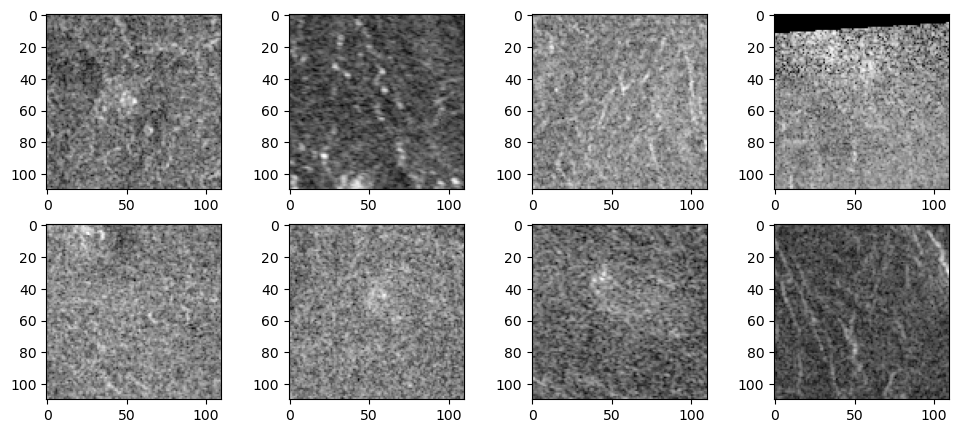

In [3]:
fig, axs = plt.subplots(2, 4)
fig.set_size_inches(12, 5)
ind = 0

for ax in axs.flat:
    img = np.array(feat.iloc[ind]).reshape((110,110))
    ax.imshow(img, cmap = 'gray')
    ind += 1

Agora, vamos entender as vari√°veis resposta:

In [4]:
resp.head()

Volcano?  Type  Radius  Number Volcanoes
0         1   3.0   17.46               1.0
1         0   NaN     NaN               NaN
2         0   NaN     NaN               NaN
3         0   NaN     NaN               NaN
4         0   NaN     NaN               NaN

Eis o que cada informa√ß√£o na vari√°vel resposta significa:

 * Se ``Volcano? = 0``, ent√£o na respectiva imagem acredita-se fortemente que **n√£o** h√° um vulc√£o
 * Se ``Volcano? = 1``, ent√£o acredita-se fortemente que naquela imagem h√° ao menos um vulc√£o, e nesse caso h√° informa√ß√µes adicionais:
   - ``Number Volcanoes`` representa quantos vulc√µes provavelmente h√° naquela imagem (nesse caso, h√° um vulc√£o centralizado na figura)
   - ``Radius`` √© o raio do vulc√£o que est√° centralizado na imagem, medido em *pixels*
   - ``Type`` √© uma vari√°vel que codifica a incerteza dos astr√¥nomos sobre a exist√™ncia de um vulc√£o naquela imagem:
     - ``Type = 1`` indica que a figura respectiva CERTAMENTE cont√©m ao menos um vulc√£o
     - ``Type = 2`` indica que a figura respectiva PROVAVELMENTE cont√©m ao menos um vulc√£o
     - ``Type = 3`` indica que a figura respectiva POSSIVELMENTE cont√©m ao menos um vulc√£o
     - ``Type = 4`` indica que a figura respectiva mostra somente uma cratera

*Obs.: No caso de ``Volcano? = 0``, as outras vari√°veis s√£o preenchidas com ``NaN``*

Note que a base de dados est√° desbalanceada.

Obs.: Gr√°fico de pizza s√≥ pra n√£o perder a oportunidade de falar mal do gr√°fico de pizza e recomendar fortemente que voc√™s N√ÉO fa√ßam esse tipo de gr√°fico! :-)

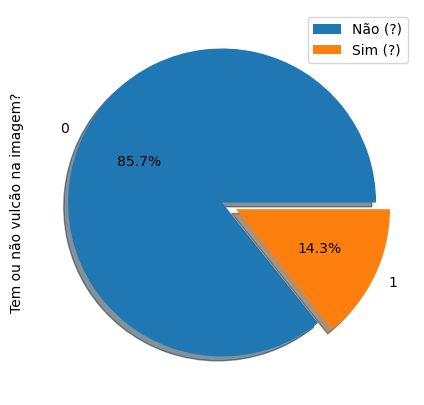

In [5]:
resp['Volcano?'].value_counts().plot(
    kind = 'pie', explode = [0, 0.1], figsize = (5, 5), autopct = '%1.1f%%', shadow = True)
plt.ylabel('Tem ou n√£o vulc√£o na imagem?')
plt.legend(['N√£o (?)', 'Sim (?)'])
plt.show()

Dentre as imagens que acredita-se ter um vulc√£o, vamos ver a distribui√ß√£o dos quatro graus de incerteza poss√≠veis:

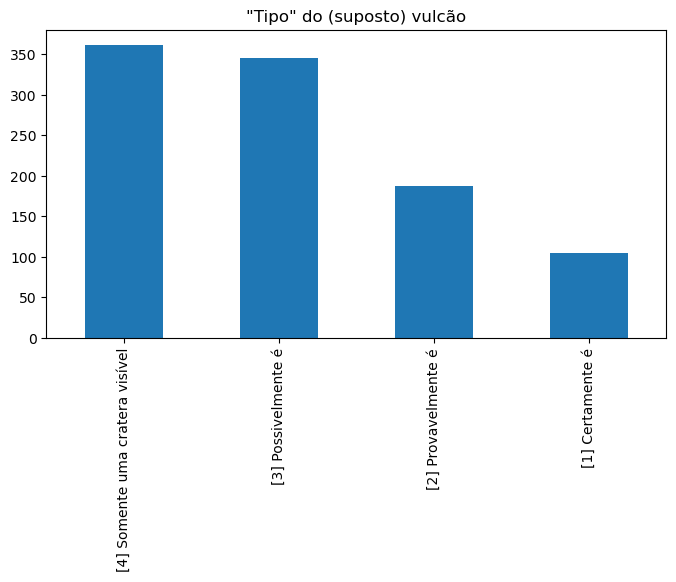

In [6]:
resp[resp['Volcano?'] == 1]['Type'].value_counts().plot(kind = 'bar', legend = False, figsize = (8, 4))
plt.title('"Tipo" do (suposto) vulc√£o')
plt.xticks(np.arange(4), ['[4] Somente uma cratera vis√≠vel', '[3] Possivelmente √©', '[2] Provavelmente √©', '[1] Certamente √©'])
plt.show()

Temos uma vari√°vel resposta cont√≠nua, que √© o raio do vulc√£o:

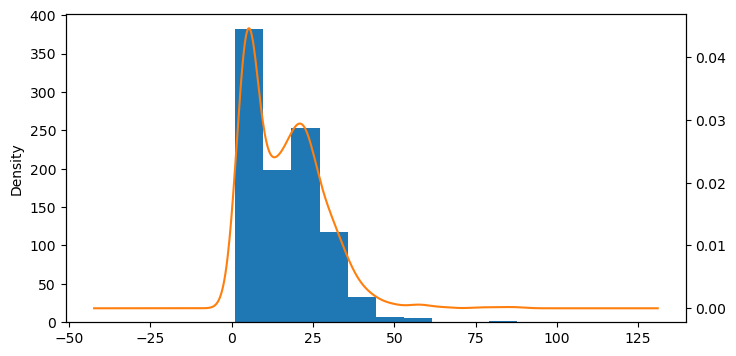

In [7]:
ax = resp[resp['Volcano?'] == 1]['Radius'].plot(kind = 'hist', legend = False, figsize = (8, 4))
resp[resp['Volcano?'] == 1]['Radius'].plot(kind = 'kde', ax = ax, secondary_y = True)
plt.show()

Finalmente, estudando a quantidade suposta de vulc√µes na imagem:

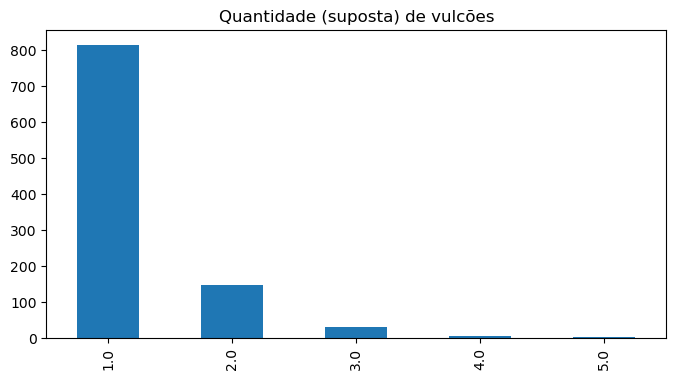

In [8]:
plt.title('Quantidade (suposta) de vulc√µes')
resp[resp['Volcano?'] == 1]['Number Volcanoes'].value_counts().plot(kind = 'bar', legend = False, figsize = (8, 4))
plt.show()

Agora, vejamos alguns exemplos de imagens da base de dados com diversas das caracter√≠sticas vistas acima:

== IMAGEM SEM VULC√ÉO ==
Volcano?            0.0
Type                NaN
Radius              NaN
Number Volcanoes    NaN
Name: 1, dtype: float64


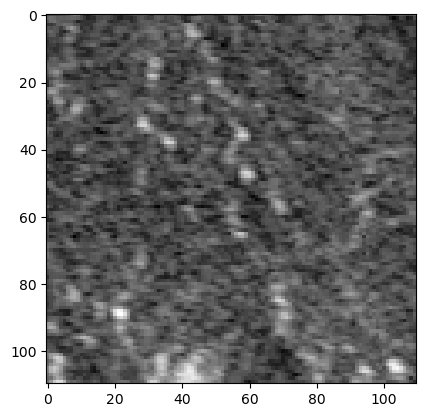

In [9]:
print('== IMAGEM SEM VULC√ÉO ==')

print(resp.iloc[1])

image = np.array(feat.iloc[1]).reshape((110,110))
plt.figure()
plt.imshow(image,cmap="gray")
plt.show()

== IMAGEM COM VULC√ÉO ==
Volcano?             1.00
Type                 1.00
Radius              22.02
Number Volcanoes     1.00
Name: 9, dtype: float64


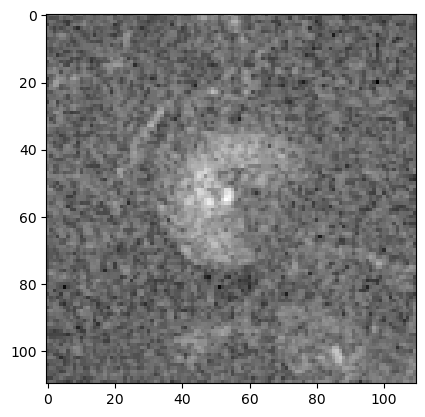

In [10]:
print('== IMAGEM COM VULC√ÉO ==')

print(resp.iloc[9])

image = np.array(feat.iloc[9]).reshape((110,110))
plt.figure()
plt.imshow(image,cmap="gray")
plt.show()

== IMAGEM COM VULC√ÉO ==
Volcano?             1.00
Type                 2.00
Radius              19.31
Number Volcanoes     1.00
Name: 38, dtype: float64


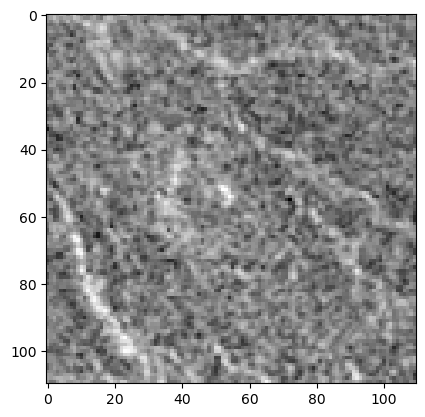

In [11]:
print('== IMAGEM COM VULC√ÉO ==')

print(resp.iloc[38])

image = np.array(feat.iloc[38]).reshape((110,110))
plt.figure()
plt.imshow(image,cmap="gray")
plt.show()

== IMAGEM COM VULC√ÉO ==
Volcano?             1.00
Type                 3.00
Radius              17.46
Number Volcanoes     1.00
Name: 0, dtype: float64


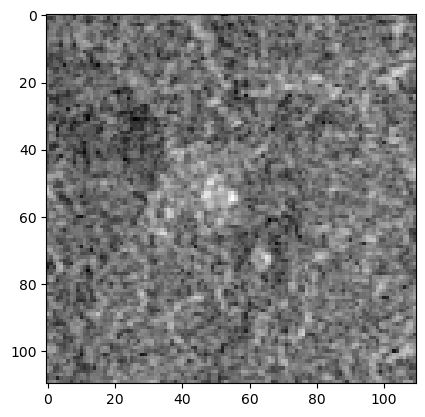

In [12]:
print('== IMAGEM COM VULC√ÉO ==')

print(resp.iloc[0])

image = np.array(feat.iloc[0]).reshape((110,110))
plt.figure()
plt.imshow(image,cmap="gray")
plt.show()

== IMAGEM COM VULC√ÉO ==
Volcano?            1.0
Type                4.0
Radius              8.0
Number Volcanoes    2.0
Name: 55, dtype: float64


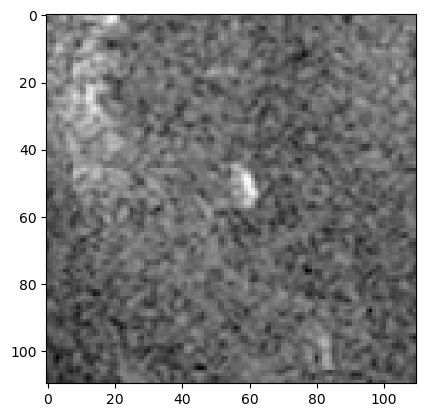

In [13]:
print('== IMAGEM COM VULC√ÉO ==')

print(resp.iloc[55])

image = np.array(feat.iloc[55]).reshape((110,110))
plt.figure()
plt.imshow(image,cmap="gray")
plt.show()

== IMAGEM COM VULC√ÉO ==
Volcano?             1.00
Type                 3.00
Radius              21.63
Number Volcanoes     2.00
Name: 34, dtype: float64


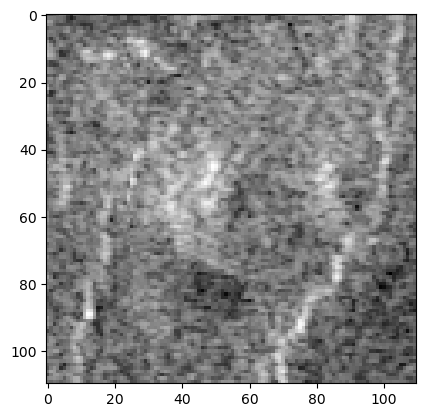

In [14]:
print('== IMAGEM COM VULC√ÉO ==')

print(resp.iloc[34])

image = np.array(feat.iloc[34]).reshape((110,110))
plt.figure()
plt.imshow(image,cmap="gray")
plt.show()

== IMAGEM COM VULC√ÉO ==
Volcano?             1.00
Type                 2.00
Radius              24.33
Number Volcanoes     3.00
Name: 596, dtype: float64


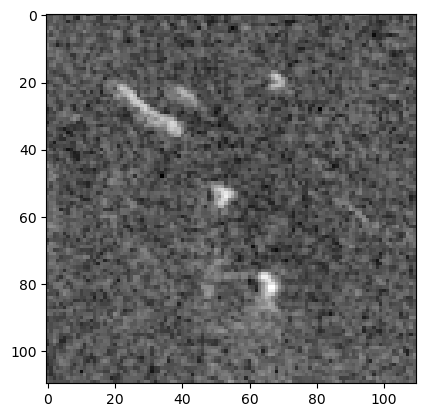

In [15]:
print('== IMAGEM COM VULC√ÉO ==')

print(resp.iloc[596])

image = np.array(feat.iloc[596]).reshape((110,110))
plt.figure()
plt.imshow(image,cmap="gray")
plt.show()

== IMAGEM COM VULC√ÉO ==
Volcano?            1.00
Type                4.00
Radius              3.61
Number Volcanoes    4.00
Name: 425, dtype: float64


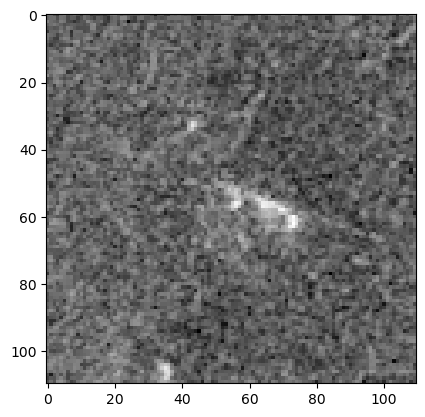

In [16]:
print('== IMAGEM COM VULC√ÉO ==')

print(resp.iloc[425])

image = np.array(feat.iloc[425]).reshape((110,110))
plt.figure()
plt.imshow(image,cmap="gray")
plt.show()

== IMAGEM COM VULC√ÉO ==
Volcano?            1.00
Type                3.00
Radius              5.83
Number Volcanoes    5.00
Name: 853, dtype: float64


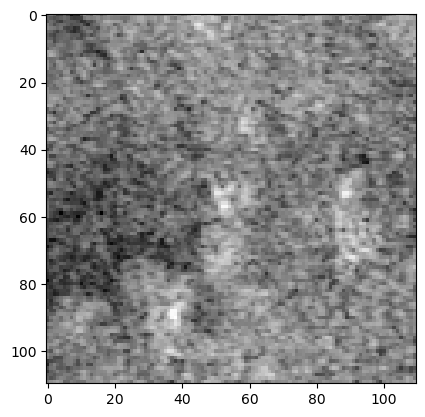

In [17]:
print('== IMAGEM COM VULC√ÉO ==')

print(resp.iloc[853])

image = np.array(feat.iloc[853]).reshape((110,110))
plt.figure()
plt.imshow(image,cmap="gray")
plt.show()

## Objetivo

O principal objetivo do projeto √© o seguinte:

* Prever, **somente a partir da imagem**, se naquela foto h√° ou n√£o um vulc√£o. Ou seja, deve ser resolvido o problema de **classifica√ß√£o bin√°ria** onde os dados observados s√£o as linhas do DataFrame ``feat`` e a vari√°vel resposta √© a coluna ``Volcano?`` do DataFrame ``resp``.

Para isso, voc√™ dever√° testar todos os classificadores que aprendemos no curso (Naive Bayes, LDA, QDA, SVM, KNN e m√©todos baseados em √°rvores), otimizar os hiperpar√¢metros (quando pertinente) e escolher qual √© o melhor classificador de cada classe, utilizando o conjunto de treinamento. Finalmente, compare o desempenho de todos eles no conjunto de teste, e decida por um classificador bom para esse problema.

Como de costume, o treinamento dos classificadores e a valida√ß√£o cruzada para otimiza√ß√£o dos hiperpar√¢metros √© um procedimento a ser realizado somente no conjunto de **treinamento**, j√° carregado. A performance dos melhores classificadores elencados deve ser aferida no conjunto de **teste**, carregado abaixo:

In [18]:
feat_test = pd.read_csv('test_images.csv', header = None)
resp_test = pd.read_csv('test_labels.csv')

### Informa√ß√µes importantes

* Justifique se voc√™ deve tomar mais cuidado com falsos negativos ou falsos positivos no objetivo do projeto.


* Voc√™ deve entregar:
  - Um Notebook do Jupyter contendo os seus c√≥digos.
  - C√©lulas de *markdown* neste notebook, na forma de um relat√≥rio, explicando o procedimento que te levou a tais classificadores, como se fosse um resumo de sua investiga√ß√£o. Entregar somente c√≥digos sem explica√ß√£o **n√£o** √© suficiente! Eu tenho que conseguir entender quais foram suas ideias e desenvolvimentos **somente a partir do texto**, sem ter que recorrer ao c√≥digo. Isso √© importante para voc√™s treinarem a escrita!


* Algumas observa√ß√µes:
  - Descreva o resultado que voc√™ obteve, e n√£o somente mostre m√©tricas sem justificativa.
  - A base de dados √© **bastante** pesada: 7.000 observa√ß√µes de 12.100 atributos (olha o cen√°rio $p > n$ a√≠!). Caso voc√™ opte por rodar localmente em sua m√°quina, dependendo da configura√ß√£o dela, alguns algoritmos podem apanhar um pouco para finalizarem a sua execu√ß√£o. Eu n√£o acredito que NB, LDA, QDA e KNN ir√£o ser problem√°ticos, por√©m florestas aleat√≥rias e especialmente o SVM costumam ser **bem** mais custoso do que os outros. No caso do SVM, proponho duas alternativas:
    - Em vez de usar o `SVC()`, que te d√° a possibilidade de escolher o *kernel* de interesse, voc√™ pode usar o `SGDClassifier()`, que est√° alocado dentro do m√≥dulo `sklearn.linear_model` (veja [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) a sua documenta√ß√£o). Conforme est√° explicitado na documenta√ß√£o, esse classificador com o par√¢mtro `loss = 'hinge'` √© equivalente ao SVM com *kernel* linear, por√©m com a vantagem de poder ser treinado em minilotes, reduzindo a quest√£o do custo computacional. O seu lado negativo √© que n√£o h√° como escolher outros *kernel*, e voc√™ ter√° que estudar mais hiperpar√¢metros para serem ajustados, conforme tamb√©m est√° explicitado na documenta√ß√£o.
    - Para usar o `SVC()` e testar outros *kernel* al√©m do linear, se o processamento estiver muito pesado, voc√™ pode reduzir o tamanho da base de dados: em vez de considerar 7.000 imagens, voc√™ pode pegar, digamos, 2.000 imagens mas mantendo a propor√ß√£o entre as classes positiva e negativa. Note que esse procedimento √© feito **somente** para aliviar a quest√£o computacional e conseguirmos finalizar o projeto em tempo finito! Em um cen√°rio real, havendo poder computacional e tempo dispon√≠veis, deve-se usar sempre todos os dados.
  - Caso voc√™ v√° usar o Google Colab para fazer esse projeto, recomendo fortemente que carreguem a base de dados atrav√©s de sincroniza√ß√£o com o Google Drive. S√≥ o conjunto de treinamento tem quase 300 Mb, e fazer *upload* disso sempre ser√° meio chato; sem contar o fato de ter que fazer *upload* sempre que a conex√£o oscilar...


* A base de dados consiste das imagens cruas, ou seja, sem nenhum pr√©-processamento. Por√©m, acrescentar essa etapa pode melhorar **muito** os seus resultados. Portanto, √© recomendada (e sugerida!) a utiliza√ß√£o das ferramentas de "*Detection of features and objects*" e "*Filtering and restoration*", dispon√≠vel no **scikit-image** (https://scikit-image.org/). Como esses procedimentos n√£o "aprendem" nada com a base de dados, n√£o h√° necessidade de fazerem parte do classificador atrav√©s de uma `Pipeline`, e podem ser aplicados na base de treinamento e teste toda.

* Para essa tarefa uma ideia interessante √© reduzir o tamanho da imagem! Como o vulc√£o est√° centralizado na figura, quando h√° ao menos um, n√£o h√° necessidade de considerar a figura toda, mas talvez uma caixinha de tamanho $10 \times 10$ em torno do centro j√° seja suficiente. Assim, voc√™ reduzir√° a quantidade de atributos de 12.100 para 100, provavelmente com pouco preju√≠zo para o desempenho da classifica√ß√£o.

* √â EXPRESSAMENTE PROIBIDO USAR REDES NEURAIS!!!! O motivo √© que temos uma (√≥tima!) disciplina sobre o tema, ent√£o usemos as coisas em seu momento devido ;-)

## Objetivo b√¥nus

Caso voc√™ queira, proponho duas tarefas b√¥nus aqui:

1) Prever, **somente a partir das imagens que t√™m ao menos um vulc√£o**, o "tipo" dele. Ou seja, deve ser resolvido o problema de **classifica√ß√£o multiclasse** onde os dados observados s√£o as linhas do DataFrame ``feat`` para as quais a vari√°vel ``Volcano?`` √© 1, e a vari√°vel resposta √© a coluna ``Type`` do DataFrame ``resp``.

2) Prever, **somente a partir das imagens que t√™m ao menos um vulc√£o**, o raio do vulc√£o que est√° centralizado na figura. Ou seja, deve ser resolvido o problema de **regress√£o** onde os dados observados s√£o as linhas do DataFrame `feat` para as quais a vari√°vel `Volcano?` √© 1, e a vari√°vel resposta √© a coluna `Radius` do DataFrame `resp`.

Note que os b√¥nus 1) e 2) s√£o independentes, e voc√™ pode fazer um e/ou outro, caso queira. Optei por n√£o colocar o 2) como tarefa obrigat√≥ria pois j√° fizemos duas atividades voltadas para problemas de regress√£o. Caso voc√™ opte por fazer o b√¥nus 1), fa√ßa tamb√©m uma descri√ß√£o de como funcionam generaliza√ß√µes dos classificadores bin√°rios para o cen√°rio multiclasse, para os classificadores que vimos at√© o momento. Mais especificamente, voc√™ dever√° dizer como que cada um deles pode ser generalizado para problemas multiclasse (√© naturalmente embutido em sua teoria? √â necess√°rio alguma t√©cnica adicional? O que √© OvO? O que √© OvA?) Descreva tamb√©m como que as m√©tricas que vimos s√£o generalizadas para o cen√°rio multiclasse.

Recomendo procurar inforfma√ß√µes em nossas duas bibliografias ([ITSL] e [AME]) e tamb√©m no *help* do scikit-learn e scikit-image.

# <center> Boa atividade!</center>

---

# Aprendizagem de M√°quina I - Projeto 03

### Aluno: Guilherme Bar√£o &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;DRE: 121062490

## √çndice<a class='anchor' id='top'></a>
- [Introdu√ß√£o](#intro)
- [Importando e Analisando os dados](#importando)üìö
- [Processando os dados](#processando)‚öôÔ∏è
- [Testando modelos de classifica√ß√£o](#testando)‚öíÔ∏è

## Introdu√ß√£o <a class='anchor' id='intro'></a> [‚Üë](#top)

Esse trabalho, como solicitado, consistir√° na an√°lise de uma base de dados contendo informa√ß√µes sobre imagens de sat√©lite da superf√≠cie de v√™nus, e na tentativa de prever a presen√ßa de vulc√µes nessas imagens com base na cor dos pixels contidos nela. A base de dados encontra-se dispon√≠vel aqui: https://www.kaggle.com/code/amantheroot/finding-volcanoes-on-venus

## üìö Importando e analisando os dados: <a class='anchor' id='importando'></a> [‚Üë](#top)

(basicamente s√≥ copiando os c√≥digos do enunciado, por organiza√ß√£o)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [20]:
feat = pd.read_csv('train_images.csv', header = None) # 'header = None' √© importante pois o .csv n√£o tem cabe√ßalho
resp = pd.read_csv('train_labels.csv')

display(feat)

0      1      2      3      4      5      6      7      8      9      \
0        95    101     99    103     95     86     96     89     70    104   
1        91     92     91     89     92     93     96    101    107    104   
2        87     70     72     74     84     78     93    104    106    106   
3         0      0      0      0      0      0      0      0      0      0   
4       114    118    124    119     95    118    105    116    123    112   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6995     90     96     88     95     94    100     95     80     80     71   
6996     82     82     84     91     74     61     73     80     75     97   
6997    133    102    121    133    129    131     98    121    123    125   
6998    118    117    115    107     92     76    100    102     81    106   
6999     74     89     92     87     72    102    100     92     86    107   

      ...  12090  12091  12092  12093  12094  12095  12096  12097  12098  \
0     ...    111    107     92     89    103     99    117    116    118   
1     ...    103     92     93     95     98    105    104    100     90   
2     ...     84     71     95    102     94     80     91     80     84   
3     ...     94     81     89     84     80     90     92     80     88   
4     ...    116    113    102     93    109    104    106    117    111   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6995  ...     88     83     72     76     73     79     76     79     84   
6996  ...    100     78     90     88     80     88     90     90     66   
6997  ...    120    123    119    111    104    102    119    130    131   
6998  ...    104    105    102    111     99     90    105    100    100   
6999  ...     91     89     88    108    121    109    121    126    116   

      12099  
0        96  
1        81  
2        90  
3        96  
4       115  
...     ...  
6995     69  
6996     71  
6997    111  
6998    109  
6999    106  

[7000 rows x 12100 columns]

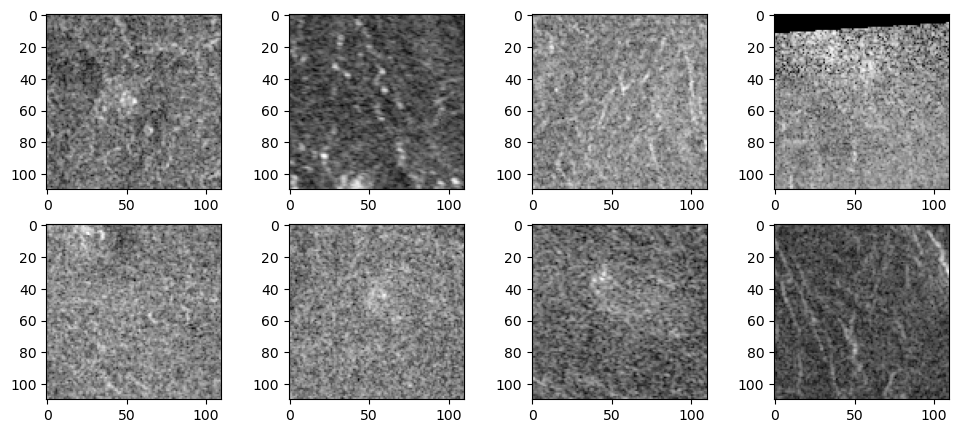

In [21]:
fig, axs = plt.subplots(2, 4)
fig.set_size_inches(12, 5)
ind = 0

for ax in axs.flat:
    img = np.array(feat.iloc[ind]).reshape((110,110))
    ax.imshow(img, cmap = 'gray')
    ind += 1

In [22]:
resp.head()

Volcano?  Type  Radius  Number Volcanoes
0         1   3.0   17.46               1.0
1         0   NaN     NaN               NaN
2         0   NaN     NaN               NaN
3         0   NaN     NaN               NaN
4         0   NaN     NaN               NaN

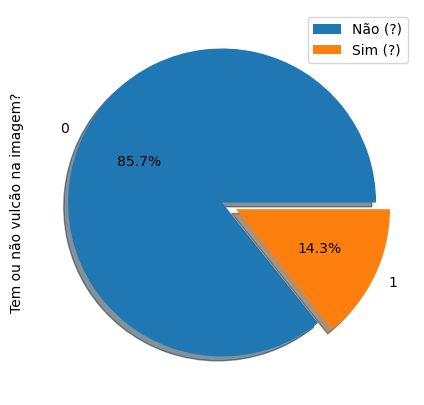

In [23]:
resp['Volcano?'].value_counts().plot(
    kind = 'pie', explode = [0, 0.1], figsize = (5, 5), autopct = '%1.1f%%', shadow = True)
plt.ylabel('Tem ou n√£o vulc√£o na imagem?')
plt.legend(['N√£o (?)', 'Sim (?)'])
plt.show()

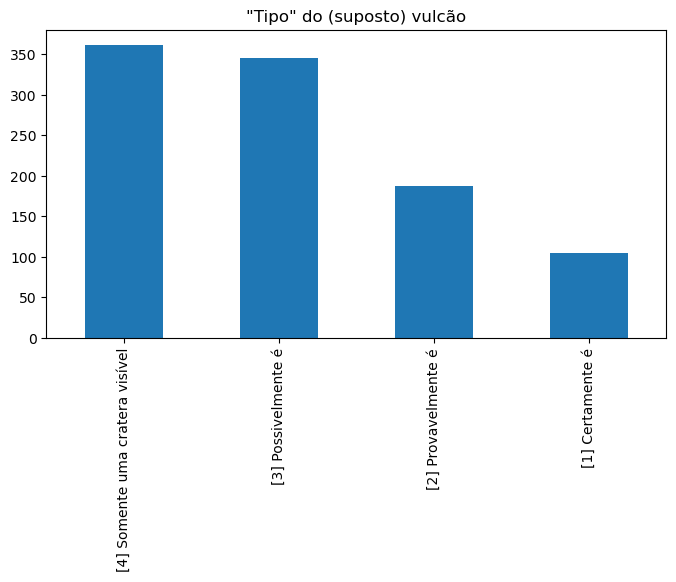

In [24]:
resp[resp['Volcano?'] == 1]['Type'].value_counts().plot(kind = 'bar', legend = False, figsize = (8, 4))
plt.title('"Tipo" do (suposto) vulc√£o')
plt.xticks(np.arange(4), ['[4] Somente uma cratera vis√≠vel', '[3] Possivelmente √©', '[2] Provavelmente √©', '[1] Certamente √©'])
plt.show()

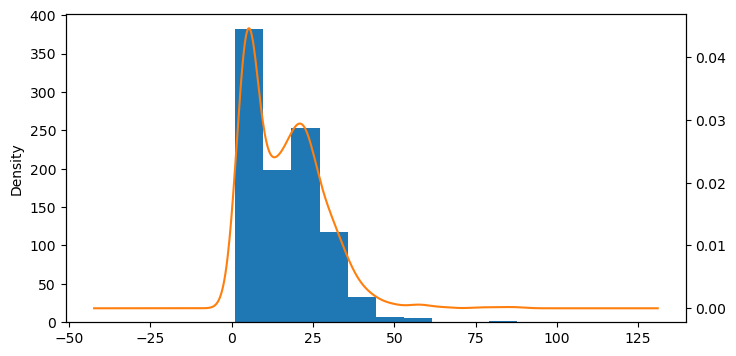

In [25]:
ax = resp[resp['Volcano?'] == 1]['Radius'].plot(kind = 'hist', legend = False, figsize = (8, 4))
resp[resp['Volcano?'] == 1]['Radius'].plot(kind = 'kde', ax = ax, secondary_y = True)
plt.show()

<Axes: xlabel='Number Volcanoes', ylabel='Count'>

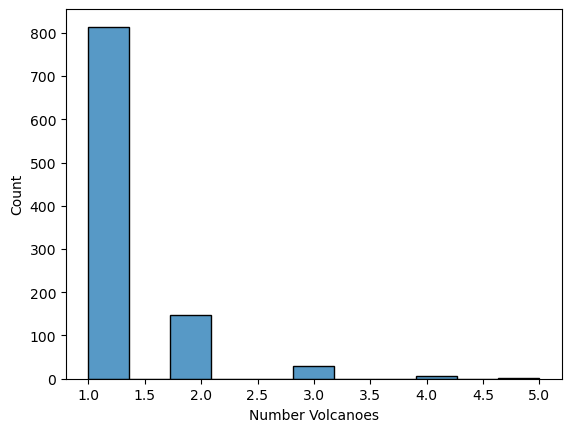

In [26]:
sns.histplot(resp,x='Number Volcanoes')


(Adicionando um gr√°fico de n√∫mero de vulc√µes, que n√£o estava presente na an√°lise. Como podemos ver, a grande maioria das imagens s√≥ cont√©m um vulc√£o.)

== IMAGEM SEM VULC√ÉO ==
Volcano?            0.0
Type                NaN
Radius              NaN
Number Volcanoes    NaN
Name: 1, dtype: float64


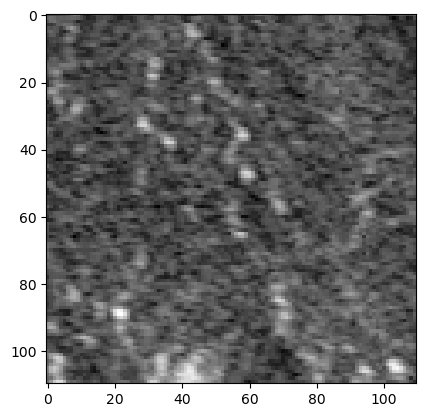

In [27]:
print('== IMAGEM SEM VULC√ÉO ==')

print(resp.iloc[1])

image = np.array(feat.iloc[1]).reshape((110,110))
plt.figure()
plt.imshow(image,cmap="gray")
plt.show()

(Uma imagem est√° bom)

In [28]:
feat_test = pd.read_csv('test_images.csv', header = None)
resp_test = pd.read_csv('test_labels.csv')

## ‚öôÔ∏è Processando os dados: <a class='anchor' id='processando'></a> [‚Üë](#top)

Copiando os datasets para evitar problemas:

In [29]:
feat_copy = feat.copy(deep=True)
resp_copy = resp.copy(deep=True)

Vendo se est√° tudo ok com os datasets (dados faltantes, errados, etc.):

In [30]:
feat_copy.isna().sum().sum()

0

In [31]:
resp_copy.describe()

Volcano?         Type       Radius  Number Volcanoes
count  7000.000000  1000.000000  1000.000000       1000.000000
mean      0.142857     2.965000    16.257650          1.236000
std       0.349952     0.984248    11.632887          0.553724
min       0.000000     1.000000     1.000000          1.000000
25%       0.000000     2.000000     5.830000          1.000000
50%       0.000000     3.000000    14.870000          1.000000
75%       0.000000     4.000000    23.555001          1.000000
max       1.000000     4.000000    87.660000          5.000000

N√£o parece haver nada de errado com os dados, o que √© um bom sinal. No entanto, ainda precisamos resolver alguns problemas: o conjunto de dados √© muito grande, o que pode tornar a realiza√ß√£o de previs√µes invi√°vel computacionalmente para alguns modelos. Al√©m disso, a quantidade absurda de "features", maior que o n√∫mero de observa√ß√µes, al√©m de piorar o processamento, tamb√©m pode prejudicar alguns modelos e causar overfitting.

Como o objetivo do trabalho √© apenas identificar a presen√ßa de um vulc√£o ou n√£o nas imagens, dado que todas as imagens com vulc√µes possuem um vulc√£o em seu centro e a grande maioria possui apenas um vulc√£o, pode ser interessante recortar um peda√ßo do centro das imagens para diminuir o n√∫mero de pixels, que s√£o nossas covari√°veis. Como o raio m√©dio dos vulc√µes √© de 16.25 pixeis segundo a tabela acima, parece razo√°vel tomar um quadrado de lado 17 (arredondando o raio pra cima), para podermos continuar cobrindo uma parte significativa dos vulc√µes nas imagens. Isso reduzir√° nosso n√∫mero total de covari√°veis de $110^2 = 12100$ para $17^2 = 289$, reduzindo dram√°ticamente o tempo computacional.

Formatando as imagens:

In [32]:
imagens = np.resize(feat_copy, (7000, 110, 110))

Criando a fun√ß√£o de recorte:

In [33]:
def cortar_imagens(imagens, raio):
    imagens_cortadas = []
    for imagem in imagens:
        y,x = imagem.shape
        startx = x//2-(raio//2)
        starty = y//2-(raio//2)    
        imagens_cortadas.append(imagem[starty:starty+raio,startx:startx+raio])
    return imagens_cortadas

Testando a fun√ß√£o:

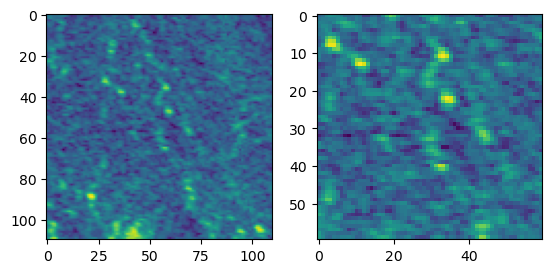

In [34]:
imagens_cortadas = cortar_imagens(imagens, 60)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(imagens[1])
ax2.imshow(imagens_cortadas[1])
plt.show()

Podemos perceber que de fato foi dado um zoom no centro, o que indica que a fun√ß√£o est√° funcionando. Fazendo o recorte proposto:

In [35]:
imagens_cortadas = cortar_imagens(imagens, 17)

In [36]:
feat_cortado = np.resize(imagens_cortadas, (7000, 289))
feat_cortado = pd.DataFrame(feat_cortado)
feat_cortado

0    1    2    3    4    5    6    7    8    9    ...  279  280  281  \
0     114  105  111  118   91  102  110  112  114  119  ...   87   81   81   
1      98   96   99   98   90   84   93   93   91   86  ...   89   94   98   
2      82   81   99  115  116  101   84   93   88  122  ...   94   90   76   
3      74  113   97  113  133  117  111  114   92   93  ...   91   77  112   
4     122  123  121   96  107  116  113  105  124  139  ...  117  116  108   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
6995   73   91   94   84   91   83   78   73   83   92  ...   78   77   84   
6996  100   95   97   95   91   63   93  115  110  102  ...   91   87  100   
6997  105  121  127  126  100  101  126  130  134  138  ...  115  134  117   
6998   96  100  104   83   93   81   60   82   99  101  ...   96   87   97   
6999   56   63   78   95   97   84   73   80   79   81  ...   72   81   67   

      282  283  284  285  286  287  288  
0      88   95  103  105   91   91   87  
1     101  101   98   93   89   87   79  
2      82   92  104   98  102   82   63  
3     117  107  100  116   98   83  110  
4     115  110   99  117  113   89   96  
...   ...  ...  ...  ...  ...  ...  ...  
6995  113  107  105  106  106   97   83  
6996   94   86  101  100   83   90   87  
6997  146  150  130  119  116  129  141  
6998   92   88   75   95   92  102   90  
6999   48   72   78   80   77   61   80  

[7000 rows x 289 columns]

Comparando o quadrado recortado antes da convers√£o para dataframe com o p√≥s-convers√£o, para garantir que tudo ocorreu certo:

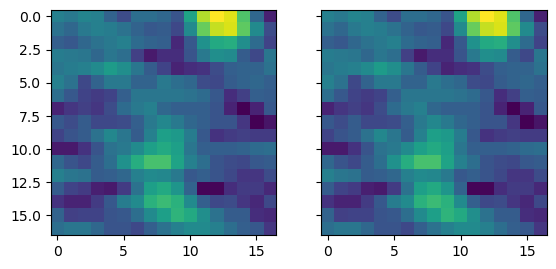

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(imagens_cortadas[1])
ax2.imshow(np.array(feat_cortado.iloc[1]).reshape((17,17)))
plt.show()

Como podemos ver, o recorte funcionou. Com sorte, isto ser√° suficiente para resolver nossos problemas com a densidade da base de dados e o poss√≠vel overfitting, e conseguiremos bons resultados nas classifica√ß√µes.

## ‚öíÔ∏è Testando modelos de classifica√ß√£o: <a class='anchor' id='testando'></a> [‚Üë](#top)

#### Renomeando os dados para melhor organiza√ß√£o e dividindo a cor dos pixels para deix√°-las de 0 a 1:

In [38]:
X_train = feat_cortado.copy(deep=True)/255
y_train = resp['Volcano?']

imagens_teste = np.resize(feat_test, (2734, 110, 110))
imagens_cortadas_teste = cortar_imagens(imagens_teste, 17)
feat_teste_cortado = np.resize(imagens_cortadas_teste, (2734, 289))
feat_teste_cortado = pd.DataFrame(feat_teste_cortado)

X_test = feat_teste_cortado.copy(deep=True)/255
y_test = resp_test['Volcano?']

#### Definindo a fun√ß√£o de encaixe dos modelos:

Para diagnosticar os modelos, √© necess√°rio levar em considera√ß√£o o desbalanceamento do conjunto de dados (a grande maioria dos registros n√£o possui vulc√£o) e qual tipo de erro √© mais importante. Quanto ao segundo problema, creio que para a tarefa que estamos realizando isso depende bastante do objetivo por tr√°s de classificar essas imagens (algo que n√£o √© especificado no roteiro do trabalho). Dessa forma, optei por utilizar o ROC AUC e a precis√£o balanceada como as estat√≠sticas de diagn√≥stico, por considerarem significativamente os 2 tipos de erro e por essa √∫ltima especificamente penalizar previs√µes desbalanceadas.

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, balanced_accuracy_score
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import FitFailedWarning

resultados = pd.DataFrame(columns=['Modelo', 'Taxa Acerto', 'Score ROC/AUC'])

@ignore_warnings(category=(FitFailedWarning, UserWarning))
def encaixe(modelos, gridsearch=False, parametros={}):
	global resultados

	for modelo in modelos:
		if gridsearch == True:
			param_grid = parametros
			fitado = GridSearchCV(modelo, param_grid,scoring='balanced_accuracy').fit(X_train,y_train)
			print(f'Melhores par√¢metros de {type(modelo).__name__} encontrados: {fitado.best_params_}')
		elif gridsearch == False:
			fitado = modelo.fit(X_train,y_train)
		y_pred = fitado.predict(X_test)
		resultados = pd.concat([resultados,pd.DataFrame({'Modelo':[type(modelo).__name__],'Taxa Acerto':[format(1-(y_test != y_pred).sum()/X_test.shape[0],'.2%')],
											  'Score ROC/AUC':[roc_auc_score(y_test, fitado.predict_proba(X_test)[:,1])],
											  'Precis√£o Balanceada':[balanced_accuracy_score(y_test, y_pred)]})])
	display(resultados)


#### Testando os modelos de Naive Bayes:

In [40]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
modelos=[GaussianNB()]
encaixe(modelos)
modelos = [MultinomialNB(), BernoulliNB(), ComplementNB()]
parametros = dict(alpha=np.linspace(0.01,10,50),force_alpha=[True], fit_prior=[True,False])
encaixe(modelos, gridsearch=True,parametros=parametros)

Modelo Taxa Acerto  Score ROC/AUC  Precis√£o Balanceada
0  GaussianNB      49.63%       0.653551             0.600641

Melhores par√¢metros de MultinomialNB encontrados: {'alpha': 6.737959183673469, 'fit_prior': False, 'force_alpha': True}
Melhores par√¢metros de BernoulliNB encontrados: {'alpha': 0.01, 'fit_prior': True, 'force_alpha': True}
Melhores par√¢metros de ComplementNB encontrados: {'alpha': 6.737959183673469, 'fit_prior': True, 'force_alpha': True}


Modelo Taxa Acerto  Score ROC/AUC  Precis√£o Balanceada
0     GaussianNB      49.63%       0.653551             0.600641
0  MultinomialNB      89.76%       0.867563             0.840054
0    BernoulliNB      19.06%       0.518913             0.518913
0   ComplementNB      89.76%       0.867563             0.840054

Podemos observar que os modelos que assumem distribui√ß√£o multinomial para as covari√°veis performam bem melhor. Faz sentido, dado que a cor dos pixels √© uma vari√°vel discreta com m√∫ltiplos poss√≠veis valores.

#### Testando os modelos de An√°lise de Discriminantes:

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
modelos = [LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]
parametros = dict(solver=['svd', 'lsqr', 'eigen'],shrinkage=[None,'auto'])
encaixe([LinearDiscriminantAnalysis()], gridsearch=True, parametros=parametros)
parametros = dict(reg_param = np.linspace(0,1,50))
encaixe([QuadraticDiscriminantAnalysis()], gridsearch=True, parametros=parametros)


Melhores par√¢metros de LinearDiscriminantAnalysis encontrados: {'shrinkage': None, 'solver': 'svd'}


Modelo Taxa Acerto  Score ROC/AUC  Precis√£o Balanceada
0                  GaussianNB      49.63%       0.653551             0.600641
0               MultinomialNB      89.76%       0.867563             0.840054
0                 BernoulliNB      19.06%       0.518913             0.518913
0                ComplementNB      89.76%       0.867563             0.840054
0  LinearDiscriminantAnalysis      91.73%       0.872363             0.767672

Melhores par√¢metros de QuadraticDiscriminantAnalysis encontrados: {'reg_param': 0.02040816326530612}


Modelo Taxa Acerto  Score ROC/AUC  \
0                     GaussianNB      49.63%       0.653551   
0                  MultinomialNB      89.76%       0.867563   
0                    BernoulliNB      19.06%       0.518913   
0                   ComplementNB      89.76%       0.867563   
0     LinearDiscriminantAnalysis      91.73%       0.872363   
0  QuadraticDiscriminantAnalysis      91.95%       0.938824   

   Precis√£o Balanceada  
0             0.600641  
0             0.840054  
0             0.518913  
0             0.840054  
0             0.767672  
0             0.760564

Conseguimos maior taxa de acerto e ROC/AUC com esses modelos, mas a custo de precis√£o balanceada. Talvez encontremos modelos mais interessantes a seguir.

#### Testando o KNN:

In [42]:
from sklearn.neighbors import KNeighborsClassifier
modelos = [KNeighborsClassifier()]
parametros = dict(n_neighbors = range(1,51), weights = ['uniform','distance'])
encaixe(modelos, gridsearch=True, parametros=parametros)

Melhores par√¢metros de KNeighborsClassifier encontrados: {'n_neighbors': 1, 'weights': 'uniform'}


Modelo Taxa Acerto  Score ROC/AUC  \
0                     GaussianNB      49.63%       0.653551   
0                  MultinomialNB      89.76%       0.867563   
0                    BernoulliNB      19.06%       0.518913   
0                   ComplementNB      89.76%       0.867563   
0     LinearDiscriminantAnalysis      91.73%       0.872363   
0  QuadraticDiscriminantAnalysis      91.95%       0.938824   
0           KNeighborsClassifier      93.01%       0.825753   

   Precis√£o Balanceada  
0             0.600641  
0             0.840054  
0             0.518913  
0             0.840054  
0             0.767672  
0             0.760564  
0             0.825753

#### Testando o SVC:

In [43]:
from sklearn.svm import SVC
modelos = [SVC(probability=True)]
parametros = dict(kernel=['linear', 'poly', 'rbf', 'sigmoid'])
encaixe(modelos, gridsearch=True, parametros=parametros)

Melhores par√¢metros de SVC encontrados: {'kernel': 'poly'}


Modelo Taxa Acerto  Score ROC/AUC  \
0                     GaussianNB      49.63%       0.653551   
0                  MultinomialNB      89.76%       0.867563   
0                    BernoulliNB      19.06%       0.518913   
0                   ComplementNB      89.76%       0.867563   
0     LinearDiscriminantAnalysis      91.73%       0.872363   
0  QuadraticDiscriminantAnalysis      91.95%       0.938824   
0           KNeighborsClassifier      93.01%       0.825753   
0                            SVC      95.14%       0.941078   

   Precis√£o Balanceada  
0             0.600641  
0             0.840054  
0             0.518913  
0             0.840054  
0             0.767672  
0             0.760564  
0             0.825753  
0             0.883227

At√© agora, o SVC polinomial √© sem d√∫vidas o melhor modelo, apresentando melhor pontua√ß√£o em todos os crit√©rios.

#### Testando os modelos baseados em √°rvores:

In [44]:
from sklearn.tree import DecisionTreeClassifier
modelos = [DecisionTreeClassifier(random_state=1)]
parametros=dict(max_depth = [0,1,2,3], min_samples_leaf = [0,1,3,5], ccp_alpha=np.logspace(-3,0,num=20))
encaixe(modelos, gridsearch=True, parametros=parametros)

Melhores par√¢metros de DecisionTreeClassifier encontrados: {'ccp_alpha': 0.001, 'max_depth': 3, 'min_samples_leaf': 1}


Modelo Taxa Acerto  Score ROC/AUC  \
0                     GaussianNB      49.63%       0.653551   
0                  MultinomialNB      89.76%       0.867563   
0                    BernoulliNB      19.06%       0.518913   
0                   ComplementNB      89.76%       0.867563   
0     LinearDiscriminantAnalysis      91.73%       0.872363   
0  QuadraticDiscriminantAnalysis      91.95%       0.938824   
0           KNeighborsClassifier      93.01%       0.825753   
0                            SVC      95.14%       0.941078   
0         DecisionTreeClassifier      89.43%       0.711261   

   Precis√£o Balanceada  
0             0.600641  
0             0.840054  
0             0.518913  
0             0.840054  
0             0.767672  
0             0.760564  
0             0.825753  
0             0.883227  
0             0.683875

Usando os hiperpar√¢metros encontrados para a decisiontree no bagging:

In [45]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

modelos = [BaggingClassifier(DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, ccp_alpha=0.001, random_state=1))]
parametros = dict(n_estimators = range(1,21))
encaixe(modelos, gridsearch=True, parametros=parametros)

Melhores par√¢metros de BaggingClassifier encontrados: {'n_estimators': 2}


Modelo Taxa Acerto  Score ROC/AUC  \
0                     GaussianNB      49.63%       0.653551   
0                  MultinomialNB      89.76%       0.867563   
0                    BernoulliNB      19.06%       0.518913   
0                   ComplementNB      89.76%       0.867563   
0     LinearDiscriminantAnalysis      91.73%       0.872363   
0  QuadraticDiscriminantAnalysis      91.95%       0.938824   
0           KNeighborsClassifier      93.01%       0.825753   
0                            SVC      95.14%       0.941078   
0         DecisionTreeClassifier      89.43%       0.711261   
0              BaggingClassifier      88.77%       0.756803   

   Precis√£o Balanceada  
0             0.600641  
0             0.840054  
0             0.518913  
0             0.840054  
0             0.767672  
0             0.760564  
0             0.825753  
0             0.883227  
0             0.683875  
0             0.676223

In [46]:
modelos = [RandomForestClassifier(random_state=1)]
parametros = dict(n_estimators = range(10, 200, 10))
encaixe(modelos, gridsearch=True, parametros=parametros)

Melhores par√¢metros de RandomForestClassifier encontrados: {'n_estimators': 150}


Modelo Taxa Acerto  Score ROC/AUC  \
0                     GaussianNB      49.63%       0.653551   
0                  MultinomialNB      89.76%       0.867563   
0                    BernoulliNB      19.06%       0.518913   
0                   ComplementNB      89.76%       0.867563   
0     LinearDiscriminantAnalysis      91.73%       0.872363   
0  QuadraticDiscriminantAnalysis      91.95%       0.938824   
0           KNeighborsClassifier      93.01%       0.825753   
0                            SVC      95.14%       0.941078   
0         DecisionTreeClassifier      89.43%       0.711261   
0              BaggingClassifier      88.77%       0.756803   
0         RandomForestClassifier      93.45%       0.959937   

   Precis√£o Balanceada  
0             0.600641  
0             0.840054  
0             0.518913  
0             0.840054  
0             0.767672  
0             0.760564  
0             0.825753  
0             0.883227  
0             0.683875  
0             0.676223  
0             0.810603

Como podemos observar, o SVC performou melhor que os outros modelos em todos os crit√©rios (com o ROC/AUC um pouco menor que o do RandomForest), e apresentou resultados muito bons num geral, mesmo com a redu√ß√£o dr√°stica no n√∫mero de features. Al√©m disso, a redu√ß√£o funcionou muito bem para reduzir o tempo computacional, permitindo a realiza√ß√£o de valida√ß√£o-cruzada nos hiperpar√¢metros de todos os modelos testados. Ser√° que conseguimos melhorar ainda mais o SVC testando outros graus de polin√¥mio?

In [47]:
modelos = [SVC(probability=True, kernel='poly')]
parametros = dict(degree = range(1,4))
encaixe(modelos, gridsearch=True, parametros=parametros)

Melhores par√¢metros de SVC encontrados: {'degree': 3}


Modelo Taxa Acerto  Score ROC/AUC  \
0                     GaussianNB      49.63%       0.653551   
0                  MultinomialNB      89.76%       0.867563   
0                    BernoulliNB      19.06%       0.518913   
0                   ComplementNB      89.76%       0.867563   
0     LinearDiscriminantAnalysis      91.73%       0.872363   
0  QuadraticDiscriminantAnalysis      91.95%       0.938824   
0           KNeighborsClassifier      93.01%       0.825753   
0                            SVC      95.14%       0.941078   
0         DecisionTreeClassifier      89.43%       0.711261   
0              BaggingClassifier      88.77%       0.756803   
0         RandomForestClassifier      93.45%       0.959937   
0                            SVC      95.14%       0.941030   

   Precis√£o Balanceada  
0             0.600641  
0             0.840054  
0             0.518913  
0             0.840054  
0             0.767672  
0             0.760564  
0             0.825753  
0             0.883227  
0             0.683875  
0             0.676223  
0             0.810603  
0             0.883227

Aparentemente o GridSearchCV encontrou 3 como o melhor grau usando a Precis√£o Balanceada como score (3 √© o valor padr√£o do modelo). Mesmo assim, considerando as pontua√ß√µes encontradas, parece razo√°vel escolher o SVC como modelo para ser utilizado em futuras identifica√ß√µes.